In [2]:
import pandas as pd

# 파일 경로 설정
csv_file_path = '0530_dataset\preprosessing_ver2.csv'
output_txt_file_path = 'distributors_list.txt'

# CSV 파일 읽기
df = pd.read_csv(csv_file_path)

# Distributor 컬럼에서 중복 제거한 값들을 리스트로 저장
distributors = set()
for distributors_str in df['Distributor']:
    for distributor in distributors_str.split(','):
        distributors.add(distributor.strip())

# 텍스트 파일로 내보내기
with open(output_txt_file_path, 'w') as file:
    for distributor in sorted(distributors):
        file.write(f"{distributor}\n")

print(f"Distributor 리스트가 {output_txt_file_path} 파일에 저장되었습니다.")


Distributor 리스트가 distributors_list.txt 파일에 저장되었습니다.


In [7]:
import pandas as pd

# 주어진 텍스트 데이터를 그대로 문자열로 저장
data = """(주)넥스트엔터테인먼트월드(NEW), A
(주)누리픽쳐스, D
(주)대교 미디어콘텐츠사업본부, D
(주)디스테이션, C
(주)라이크콘텐츠, D
(주)레드아이스 엔터테인먼트, D
(주)마인드마크, D
(주)명필름, D
(주)무비다이브, D
(주)미디어캐슬, C
(주)바른손이앤에이, D
(주)바이포엠스튜디오, D
(주)박수엔터테인먼트, C
(주)버킷스튜디오, D
(주)블루라벨픽쳐스, D
(주)쇼박스, A
(주)스마일이엔티, B
(주)스튜디오 산타클로스엔터테인먼트, D
(주)스튜디오디에이치엘, D
(주)시네마6411, D
(주)시네마달, D
(주)싸이더스, B
(주)씨네필운, D
(주)씨제이이엔엠, A
(주)아센디오, D
(주)아이오케이컴퍼니, D
(주)애니플러스, C
(주)에이스메이커무비웍스, B
(주)엣나인필름, B
(주)영화사 그램, D
(주)영화사 안다미로, D
(주)영화사 진진, C
(주)영화특별시에스엠씨, D
(주)올스타엔터테인먼트, C
(주)이놀미디어, D
(주)제이앤씨미디어그룹, D
(주)케이티알파, D
(주)콘텐츠지오, D
(주)키다리스튜디오, B
(주)티캐스트, C
(주)팝엔터테인먼트, C
(주)플레이그램, D
(주)하이스트레인저, D
(주)홈초이스, D
CGV ICECON, A
M&M 인터내셔널, C
TCO(주)더콘텐츠온, C
그린나래미디어(주), C
다큐스토리, D
더핑크퐁컴퍼니(주), D
롯데컬처웍스(주)롯데시네마, A
롯데컬처웍스(주)롯데엔터테인먼트, A
롯데컬처웍스(주)롯시플, A
리바이브콘텐츠 주식회사, D
메가박스중앙(주), A
미디어나무(주), D
소니픽쳐스엔터테인먼트코리아주식회사극장배급지점, A
스튜디오 에이드, D
스튜디오두마, D
씨제이 씨지브이(CJ CGV)(주), A
씨제이포디플렉스 주식회사, A
에스엠지홀딩스 주식회사, D
오드, C
와이드 릴리즈(주), C
워너브러더스 코리아(주), A
워터홀컴퍼니(주), C
월트디즈니컴퍼니코리아 유한책임회사, A
유니버설픽쳐스인터내셔널 코리아(유), B
유한회사 엠프로젝트, D
주식회사 블루필름웍스, D
주식회사 에이비오엔터테인먼트, D
주식회사 에이투지엔터테인먼트, D
주식회사 올랄라스토리, D
주식회사 왓챠, C
주식회사 필름영, C
찬란, C
트윈플러스파트너스(주), D
판씨네마(주), B
플러스엠 엔터테인먼트, A
홀리가든, D"""

# 빈 리스트 초기화
distributors_list = []
grades_list = []

# 데이터를 줄 단위로 나누기
lines = data.strip().split('\n')
for line in lines:
    distributor, grade = line.strip().rsplit(',', 1)
    distributors_list.append(distributor.strip())
    grades_list.append(grade.strip())

# 데이터프레임 생성
df = pd.DataFrame({
    'Distributor': distributors_list,
    '평가': grades_list
})

# csv 파일로 내보내기
output_csv_file_path = 'distributors.csv'
df.to_csv(output_csv_file_path, index=False, encoding='utf-8')

print(f"Distributor와 평가 컬럼이 포함된 CSV 파일이 {output_csv_file_path}에 저장되었습니다.")


Distributor와 평가 컬럼이 포함된 CSV 파일이 distributors.csv에 저장되었습니다.


In [8]:
import pandas as pd

# CSV 파일 경로 설정
movies_csv_path = '0530_dataset\preprosessing_ver2.csv'
distributors_csv_path = '0530_dataset\distributors.csv'
output_csv_path = 'preprosessing_ver3.csv'

# 영화 데이터와 배급사 평가 데이터를 읽기
movies_df = pd.read_csv(movies_csv_path)
distributors_df = pd.read_csv(distributors_csv_path)

# 배급사 평가 데이터를 딕셔너리로 변환
distributor_grades = dict(zip(distributors_df['Distributor'], distributors_df['평가']))

def evaluate_distributors(distributor_str, grades_dict):
    # 배급사 문자열을 분리
    distributors = [d.strip() for d in distributor_str.split(',')]
    # 배급사 등급 리스트 생성
    grades = [grades_dict.get(d, 'D') for d in distributors]
    
    # 평가 기준 적용
    if 'A' in grades:
        return 'A'
    elif 'B' in grades:
        return 'B'
    elif 'C' in grades:
        return 'C'
    else:
        return 'D'

# Distributor_Sc 컬럼 추가
movies_df['Distributor_Sc'] = movies_df['Distributor'].apply(evaluate_distributors, grades_dict=distributor_grades)

# 결과를 CSV 파일로 저장
movies_df.to_csv(output_csv_path, index=False, encoding='utf-8')

print(f"Distributor_Sc 컬럼이 포함된 CSV 파일이 {output_csv_path}에 저장되었습니다.")


Distributor_Sc 컬럼이 포함된 CSV 파일이 preprosessing_ver3.csv에 저장되었습니다.


In [11]:
import pandas as pd

# CSV 파일 경로 설정
movies_csv_path = '0530_dataset/preprosessing_ver3.csv'

# 영화 데이터 읽기
movies_df = pd.read_csv(movies_csv_path)

# 감독 이름과 배우가 비어 있는 행 필터링
empty_director_movies = movies_df[movies_df['Director'].isna() | (movies_df['Director'].str.strip() == '')]
empty_actors_movies = movies_df[movies_df['Actors'].isna() | (movies_df['Actors'].str.strip() == '')]

# 둘 다 비어 있는 행 필터링
empty_both_movies = movies_df[(movies_df['Director'].isna() | (movies_df['Director'].str.strip() == '')) &
                              (movies_df['Actors'].isna() | (movies_df['Actors'].str.strip() == ''))]

# 감독 이름이 비어 있는 영화 제목
print("감독 이름이 비어 있는 영화 제목:")
print(empty_director_movies['Movie_Title'].tolist())

# 배우가 비어 있는 영화 제목
print("배우가 비어 있는 영화 제목:")
print(empty_actors_movies['Movie_Title'].tolist())

# 감독 이름과 배우가 둘 다 비어 있는 영화 제목
print("감독 이름과 배우가 둘 다 비어 있는 영화 제목:")
print(empty_both_movies['Movie_Title'].tolist())


감독 이름이 비어 있는 영화 제목:
['슈퍼 마리오 브라더스', '던전 앤 드래곤: 도적들의 명예', '그란 투리스모', '말하고 싶은 비밀', '아기상어 극장판: 사이렌 스톤의 비밀', '극장판 도라에몽: 진구와 하늘의 유토피아', '아이유 콘서트 : 더 골든 아워', '바다 탐험대 옥토넛 어보브 앤 비욘드 : 육지 넘어 하늘까지!', '바다 탐험대 옥토넛 : 탐험선 대작전', '유미의 세포들 더 무비', '바다 탐험대 옥토넛 어보브 앤 비욘드: 버드, 옥토경보를 울려라!', '이빨요정 비올레타: 요정나라로 돌아갈래!', '바다 탐험대 옥토넛 육지수호 대작전 : 열대우림을 지켜라!', '정글번치: 월드투어', '애프터썬', '비투비 타임 : 비투게더 더 무비', '테일러 스위프트 디 에라스 투어', '돌핀보이', '너는 내 아들', '이승윤 콘서트 도킹 : 리프트오프', '루이스 웨인: 사랑을 그린 고양이 화가', '극장판 바다 탐험대 옥토넛 : 해저동굴 대탈출']
배우가 비어 있는 영화 제목:
['엘리멘탈', '더 퍼스트 슬램덩크', '건국전쟁', '신차원! 짱구는 못말려 더 무비 초능력 대결전 ~날아라 수제김밥~', '극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교', '명탐정코난: 흑철의 어영', '극장판 짱구는 못말려: 동물소환 닌자 배꼽수비대', '귀멸의 칼날: 인연의 기적, 그리고 합동 강화 훈련으로', '명탐정 코난: 할로윈의 신부', '원피스 필름 레드', '톡 투 미', '포켓몬스터: 성도지방 이야기, 최종장', '눈의 여왕5: 스노우 프린세스와 미러랜드의 비밀', '두다다쿵: 후후섬의 비밀', '그란 투리스모', '문재인입니다', '사나: 저주의 아이', '바다 탐험대 옥토넛 어보브 앤 비욘드: 버드, 옥토경보를 울려라!', '크레센도', '이빨요정 비올레타: 요정나라로 돌아갈래!', '런닝맨: 리벤져스', '마야 3: 숲속 왕국의 위기', '정글번치: 월드투어', '아인보: 아마존의 전설', '마브카 : 숲의 노래', '로봇 드림',

In [2]:
import pandas as pd

# CSV 파일 경로 설정
movies_csv_path = '0530_dataset/preprosessing_ver3.csv'

# 영화 데이터 읽기
movies_df = pd.read_csv(movies_csv_path)

# 감독 이름 또는 배우가 비어 있는 행 필터링
empty_director_or_actors_movies = movies_df[movies_df['Director'].isna() | (movies_df['Director'].str.strip() == '') |
                                            movies_df['Actors'].isna() | (movies_df['Actors'].str.strip() == '')]

# 감독 이름 또는 배우가 비어 있는 행 삭제
cleaned_movies_df = movies_df.drop(empty_director_or_actors_movies.index)

# 삭제된 행 정보
deleted_movies = empty_director_or_actors_movies[['Movie_Title', 'Director', 'Actors']]

print(deleted_movies)
# 저장된 데이터를 새로운 CSV 파일로 저장 (원본 데이터를 덮어쓰지 않기 위해 경로 변경)
cleaned_movies_csv_path = 'cleaned_preprosessing_ver3.csv'
cleaned_movies_df.to_csv(cleaned_movies_csv_path, index=False)

                              Movie_Title          Director  \
7                                    엘리멘탈              피터 손   
11                             더 퍼스트 슬램덩크         이노우에 다케히코   
24                            슈퍼 마리오 브라더스               NaN   
47                                   건국전쟁               김덕영   
53   신차원! 짱구는 못말려 더 무비 초능력 대결전 ~날아라 수제김밥~            오네 히토시   
59          극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교          타카하시 와타루   
61                          명탐정코난: 흑철의 어영          타치카와 유즈루   
66             극장판 짱구는 못말려: 동물소환 닌자 배꼽수비대         하시모토 마사카즈   
83         귀멸의 칼날: 인연의 기적, 그리고 합동 강화 훈련으로          소토자키 하루오   
84                        명탐정 코난: 할로윈의 신부          미츠나카 스스무   
110                     던전 앤 드래곤: 도적들의 명예               NaN   
127                             원피스 필름 레드           타니구치 고로   
131                                 톡 투 미    대니 필리푸,마이클 필리푸   
139                  포켓몬스터: 성도지방 이야기, 최종장          유야마 쿠니히코   
141            눈의 여왕5: 스노우 프린세스와 미러랜드의 비밀         알렉세이 

In [2]:
import pandas as pd

# CSV 파일 읽기
file_path = 'updated_file.csv'  # 파일 경로를 지정하세요
df = pd.read_csv(file_path)

# Update w2_au and w3_au for all rows
df['w1_av_sc'] = df['w1_au'] / df['w1_av_sc']
df['w2_av_sc'] = df['w2_au'] / df['w2_av_sc']
df['w3_av_sc'] = df['w3_au'] / df['w3_av_sc']

# 업데이트된 데이터프레임을 확인합니다
print(df[['Movie_Title', 'w1_av_sc', 'w2_av_sc', 'w3_av_sc']])

# 변경된 내용을 새로운 CSV 파일로 저장합니다
df.to_csv('updated_file.csv', index=False)


    Movie_Title     w1_av_sc     w2_av_sc     w3_av_sc
0         서울의 봄  1062.717386  1189.735052  1074.807535
1            파묘  1560.289309  1501.112580   898.330183
2         범죄도시4  1735.738878  1370.078330   606.151817
3     아바타: 물의 길  1154.896109  1265.188198   974.919402
4         범죄도시3  2527.987292   951.132874   741.933813
..          ...          ...          ...          ...
247    나이트메어 앨리    68.311025    51.121013    59.029851
248     어나더 라운드    88.648438   172.478261   133.559229
249         시라노   106.430614    26.863158    43.633333
250     리코리쉬 피자    65.677918    43.432308    48.137441
251      우연과 상상   205.234463   106.270950    80.111111

[252 rows x 4 columns]


In [3]:
import pandas as pd

# CSV 파일 읽기
file_path = 'updated_file.csv'  # 파일 경로를 지정하세요
df = pd.read_csv(file_path)

# 필요한 컬럼만 추출
selected_columns = df[['w1_au', 'w2_au', 'w1_av_sc', 'w2_av_sc']]

# 추출한 데이터프레임을 확인합니다
print(selected_columns)

# 추출한 내용을 새로운 CSV 파일로 저장합니다
selected_columns.to_csv('selected_columns.csv', index=False)


       w1_au    w2_au     w1_av_sc     w2_av_sc
0    2364698  2703248  1062.717386  1189.735052
1    3312940  3293441  1560.289309  1501.112580
2    5005375  3713108  1735.738878  1370.078330
3    3201537  2814863  1154.896109  1265.188198
4    6053085  1993031  2527.987292   951.132874
..       ...      ...          ...          ...
247    27705     7785    68.311025    51.121013
248    14589     7934    88.648438   172.478261
249    18078     2552   106.430614    26.863158
250    13342     4033    65.677918    43.432308
251    10379     5435   205.234463   106.270950

[252 rows x 4 columns]


In [2]:
import pandas as pd

# CSV 파일 읽기
file_path = '0530_dataset\combined_trend_data_adjusted.csv'  # 파일 경로를 지정하세요
df = pd.read_csv(file_path, header=None)

# 'period' 행 제거
df = df[df[0] != 'period']

# 컬럼명을 첫 번째 행으로 설정
df.columns = df.iloc[0]
df = df[1:]

# 인덱스를 새로 설정
df.reset_index(drop=True, inplace=True)

# 업데이트된 데이터프레임을 확인합니다
print(df)

# 변경된 내용을 새로운 CSV 파일로 저장합니다
df.to_csv('updated_file.csv', index=False)


0          NaN         1         2                  3                   4  \
0        서울의 봄  55.50419  73.67073           79.25816   71.19690682872215   
1           파묘  67.49954  82.78116  75.60018635864003   84.74670131624185   
2        범죄도시4     100.0  84.14176           70.42814    31.6227952530688   
3    아바타: 물의 길  84.31055  82.30668           81.87475   75.60018635864003   
4        범죄도시3  95.40589   93.4583           83.45108   75.60018635864003   
..         ...       ...       ...                ...                 ...   
247   나이트메어 앨리  82.97027  75.13949           76.48352   75.60018635864003   
248    어나더 라운드  72.34199  74.63083           89.75191   75.60018635864003   
249        시라노     100.0   94.2359           92.18332   69.12874743020433   
250    리코리쉬 피자  93.22194   84.3693           85.79459   75.60018635864003   
251     우연과 상상  66.60961     100.0           92.80358  37.830231116100606   

0                    5         6         7  
0    91.71449075599527  88.934

In [13]:
import pandas as pd
import numpy as np

# CSV 파일 읽기
file_path = 'trend_data_ver1.csv'  # 파일 경로를 지정하세요
df = pd.read_csv(file_path)

# 정규화 함수
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# 단순선형회귀를 계산하는 함수
def linear_regression_slope(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    slope = numerator / denominator
    return slope

# 각 행에 대해 정규화 및 회귀 기울기 계산
slopes = []
nt_ch=[]

for index, row in df.iterrows():
    # 1~7번 컬럼 선택 및 정규화
    data = row[1:8].astype(float)
    normalized_data = data
    
    # 단순선형회귀 수행
    X = np.arange(len(normalized_data))
    y = normalized_data.values
    slope = linear_regression_slope(X, y)
    
    # 기울기를 리스트에 추가
    slopes.append(slope)

 # 5, 6, 7번째 컬럼 값의 평균 계산
    avg_567 = row[5:8].mean()
    # 1, 2, 3, 4번째 컬럼 값의 평균 계산
    avg_1234 = row[1:5].mean()
    # nt_ch 값 계산
    nt_change = avg_567 - avg_1234
    nt_ch.append(nt_change)

# 새로운 컬럼으로 기울기 추가
df['slope'] = slopes
df['nt_ch'] = nt_ch

# 결과 출력
print(df)

# 변경된 내용을 새로운 CSV 파일로 저장합니다
df.to_csv('trend_data_ver3.csv', index=False)


    Unnamed: 0          1          2          3          4          5  \
0        서울의 봄   55.50419   73.67073  79.258160  71.196907  91.714491   
1           파묘   67.49954   82.78116  75.600186  84.746701  78.130190   
2        범죄도시4  100.00000   84.14176  70.428140  31.622795  46.606955   
3    아바타: 물의 길   84.31055   82.30668  81.874750  75.600186  68.314406   
4        범죄도시3   95.40589   93.45830  83.451080  75.600186  87.464819   
..         ...        ...        ...        ...        ...        ...   
247   나이트메어 앨리   82.97027   75.13949  76.483520  75.600186  81.091432   
248    어나더 라운드   72.34199   74.63083  89.751910  75.600186  63.456581   
249        시라노  100.00000   94.23590  92.183320  69.128747  67.918143   
250    리코리쉬 피자   93.22194   84.36930  85.794590  75.600186  80.476387   
251     우연과 상상   66.60961  100.00000  92.803580  37.830231  52.971372   

            6         7     slope      nt_ch  
0    88.93493  72.35861  3.341000  14.428514  
1    54.66054  51.43671 -3.63

In [14]:
import pandas as pd

# 두 개의 CSV 파일 읽기
trend_data_file = 'trend_data_ver3.csv'  # 'slope' 열이 있는 파일
selected_columns_file = 'selected_columns.csv'  # 새로 'slope' 열을 추가할 파일

# 파일 읽기
trend_data_df = pd.read_csv(trend_data_file)
selected_columns_df = pd.read_csv(selected_columns_file)

# 'slope' 열 추가
selected_columns_df['slope'] = trend_data_df['slope']
selected_columns_df.drop("w2_av_sc",axis=1,inplace=True)
selected_columns_df['nt_ch'] = trend_data_df['nt_ch']
# 결과 확인
print(selected_columns_df)

# 변경된 내용을 새로운 CSV 파일로 저장합니다
selected_columns_df.to_csv('updated_selected_columns_ver3.csv', index=False)


       w1_au    w2_au     w1_av_sc     slope      nt_ch
0    2364698  2703248  1062.717386  3.341000  14.428514
1    3312940  3293441  1560.289309 -3.639276 -16.247750
2    5005375  3713108  1735.738878 -9.448224 -25.088222
3    3201537  2814863  1154.896109 -5.553272 -21.186660
4    6053085  1993031  2527.987292 -3.408415  -7.869458
..       ...      ...          ...       ...        ...
247    27705     7785    68.311025 -3.156890  -8.669696
248    14589     7934    88.648438 -3.403573 -16.773495
249    18078     2552   106.430614 -7.714237 -26.184817
250    13342     4033    65.677918 -4.657260 -14.386322
251    10379     5435   205.234463 -4.895917 -15.621408

[252 rows x 5 columns]


In [ ]:
import pandas as pd

# CSV 파일 읽기
file_path = 'updated_selected_columns.csv'  # 파일 경로를 지정하세요
df = pd.read_csv(file_path)

# 상관 관계 매트릭스 생성
correlation_matrix = df.corr()

# 상관 관계 매트릭스 출력
print(correlation_matrix)


In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# CSV 파일 읽기
file_path = 'updated_selected_columns.csv'  # 파일 경로를 지정하세요
df = pd.read_csv(file_path)

# 독립 변수와 종속 변수 설정
X = df[['w1_au', 'w1_av_sc', 'slope']]
y = df['w2_au']

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (정규화)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 모델 학습
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# 피처 중요도 출력
feature_importances = rf.feature_importances_
print('Feature Importances:', feature_importances)

# 피처 중요도를 기반으로 피처 선택
selector = SelectFromModel(rf, prefit=True, threshold='mean')
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# 선택된 피처 확인
selected_features = X.columns[selector.get_support()]
print('Selected Features:', selected_features)

# 선택된 피처로 모델 재학습 및 평가
rf_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)
y_pred_train = rf_selected.predict(X_train_selected)
y_pred_test = rf_selected.predict(X_test_selected)

# 모델 평가
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MSE: {mse_train:.4f}')
print(f'Test MSE: {mse_test:.4f}')
print(f'Training RMSE: {rmse_train:.4f}')
print(f'Test RMSE: {rmse_test:.4f}')
print(f'Training R^2: {r2_train:.4f}')
print(f'Test R^2: {r2_test:.4f}')


Feature Importances: [0.83691205 0.1206459  0.04244205]
Selected Features: Index(['w1_au'], dtype='object')
Training MSE: 9754050271.1377
Test MSE: 61544063892.6920
Training RMSE: 98762.5955
Test RMSE: 248080.7608
Training R^2: 0.9669
Test R^2: 0.6448


In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# CSV 파일 읽기
file_path = 'updated_selected_columns.csv'  # 파일 경로를 지정하세요
df = pd.read_csv(file_path)

# 독립 변수와 종속 변수 설정
X = df[['w1_au', 'w1_av_sc', 'slope']]
y = df['w2_au']

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (정규화)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 모델 학습
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# 모든 피처를 사용한 모델 학습 및 평가
y_pred_train = rf.predict(X_train_scaled)
y_pred_test = rf.predict(X_test_scaled)

# 모델 평가
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MSE: {mse_train:.4f}')
print(f'Test MSE: {mse_test:.4f}')
print(f'Training RMSE: {rmse_train:.4f}')
print(f'Test RMSE: {rmse_test:.4f}')
print(f'Training R^2: {r2_train:.4f}')
print(f'Test R^2: {r2_test:.4f}')


Training MSE: 10982193196.0591
Test MSE: 40232469462.0445
Training RMSE: 104795.9598
Test RMSE: 200580.3317
Training R^2: 0.9628
Test R^2: 0.7678


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# CSV 파일 읽기
file_path = 'updated_selected_columns_ver2.csv'  # 파일 경로를 지정하세요
df = pd.read_csv(file_path)

# 피처와 타겟 변수 설정
X_all = df[['w1_au', 'w1_av_sc', 'slope']]
X_without_slope = df[['w1_au', 'w1_av_sc']]
y = df['w2_au']

# 데이터 스케일링 (정규화)
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)
X_without_slope_scaled = scaler.fit_transform(X_without_slope)

# 랜덤 포레스트 모델 설정
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# K-폴드 교차 검증 설정 (예: K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증 수행 (모든 피처 포함)
cv_scores_all = cross_val_score(rf, X_all_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# 교차 검증 수행 (slope 피처 제외)
cv_scores_without_slope = cross_val_score(rf, X_without_slope_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# 교차 검증 결과 출력
print(f'Cross-Validation MSE Scores (All features): {-cv_scores_all}')
print(f'Mean Cross-Validation MSE (All features): {-np.mean(cv_scores_all)}')
print(f'Standard Deviation of Cross-Validation MSE (All features): {np.std(cv_scores_all)}')

print(f'Cross-Validation MSE Scores (Without slope): {-cv_scores_without_slope}')
print(f'Mean Cross-Validation MSE (Without slope): {-np.mean(cv_scores_without_slope)}')
print(f'Standard Deviation of Cross-Validation MSE (Without slope): {np.std(cv_scores_without_slope)}')

# 최종 모델 학습 및 평가 (모든 피처 포함)
rf.fit(X_all_scaled, y)
y_pred_all = rf.predict(X_all_scaled)
mse_all = mean_squared_error(y, y_pred_all)
rmse_all = np.sqrt(mse_all)
r2_all = r2_score(y, y_pred_all)

print(f'Overall MSE (All features): {mse_all:.4f}')
print(f'Overall RMSE (All features): {rmse_all:.4f}')
print(f'Overall R^2 (All features): {r2_all:.4f}')

# 최종 모델 학습 및 평가 (slope 피처 제외)
rf.fit(X_without_slope_scaled, y)
y_pred_without_slope = rf.predict(X_without_slope_scaled)
mse_without_slope = mean_squared_error(y, y_pred_without_slope)
rmse_without_slope = np.sqrt(mse_without_slope)
r2_without_slope = r2_score(y, y_pred_without_slope)

print(f'Overall MSE (Without slope): {mse_without_slope:.4f}')
print(f'Overall RMSE (Without slope): {rmse_without_slope:.4f}')
print(f'Overall R^2 (Without slope): {r2_without_slope:.4f}')


Cross-Validation MSE Scores (All features): [3.97026819e+10 8.93490539e+10 7.16840913e+10 4.96569719e+10
 5.15261035e+10]
Mean Cross-Validation MSE (All features): 60383780476.32274
Standard Deviation of Cross-Validation MSE (All features): 17820857401.24921
Cross-Validation MSE Scores (Without slope): [5.28969263e+10 4.81670804e+10 8.91428854e+10 5.32510958e+10
 6.88887794e+10]
Mean Cross-Validation MSE (Without slope): 62469353483.49713
Standard Deviation of Cross-Validation MSE (Without slope): 15058877699.930178
Overall MSE (All features): 8504399864.6893
Overall RMSE (All features): 92219.3031
Overall R^2 (All features): 0.9685
Overall MSE (Without slope): 9593023597.7404
Overall RMSE (Without slope): 97943.9819
Overall R^2 (Without slope): 0.9645


             w1_au  w1_av_sc     nt_ch     w2_au
w1_au     1.000000  0.928486  0.072601  0.897075
w1_av_sc  0.928486  1.000000  0.123090  0.813895
nt_ch     0.072601  0.123090  1.000000  0.126340
w2_au     0.897075  0.813895  0.126340  1.000000


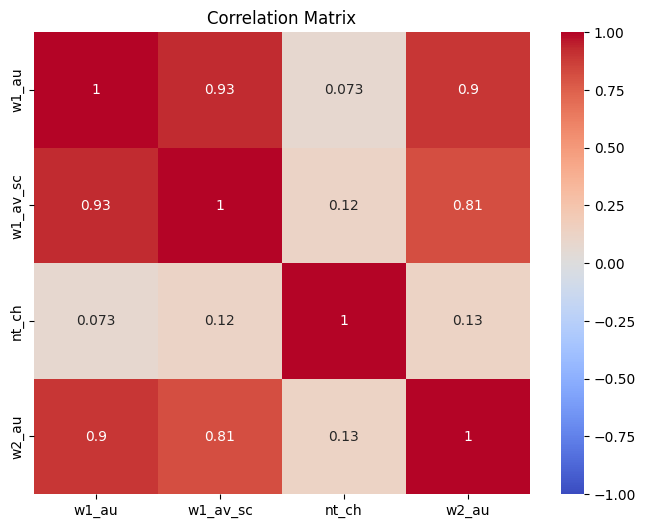

Cross-Validation MSE Scores: [2.08023414e+11 4.63796427e+10 2.34620342e+10 3.65388780e+10
 7.95883812e+10]
Mean Cross-Validation MSE: 78798469938.5149
Standard Deviation of Cross-Validation MSE: 67228988758.944115
Test MSE: 38050515747.3692
Test RMSE: 195065.4140
Test R^2: 0.7804
165       8120
6      1901895
111      56314
172       7871
115      56556
183      10175
199       5960
235      41799
9      1563042
30      253486
60      171459
218     372416
226     129211
159      12214
68      128647
148      23717
196       4037
15      972246
101      52147
24      574434
86       90906
19      441319
117      34201
124      41683
33      348882
242      22856
186       9060
219     283684
10     1432559
162       9212
140      17953
96       96568
125      34421
82       75284
213       4445
25      397309
109      52791
18      693022
205       5608
182      12473
67      158324
132      18510
156       7549
143      24967
45      304725
178      10456
16      911420
66      172740

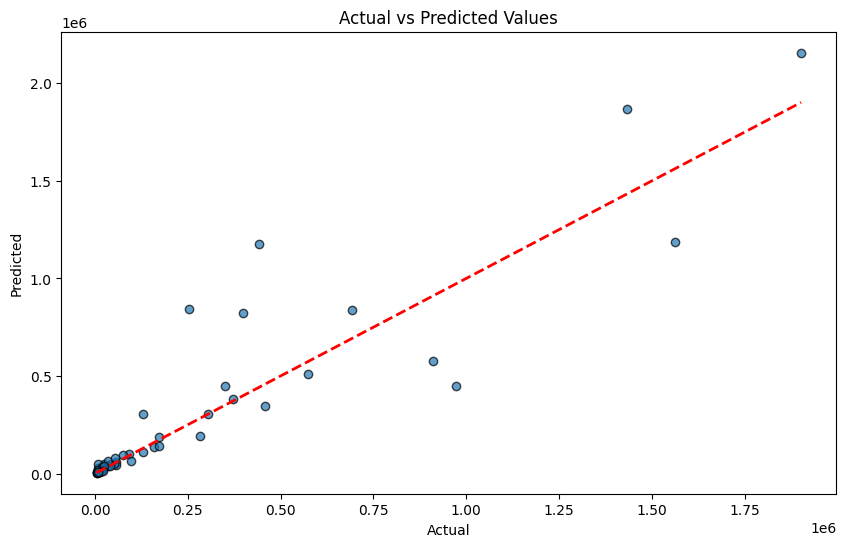

Feature: w1_au, Importance: 0.9082
Feature: w1_av_sc, Importance: 0.0867
Feature: nt_ch, Importance: 0.0051


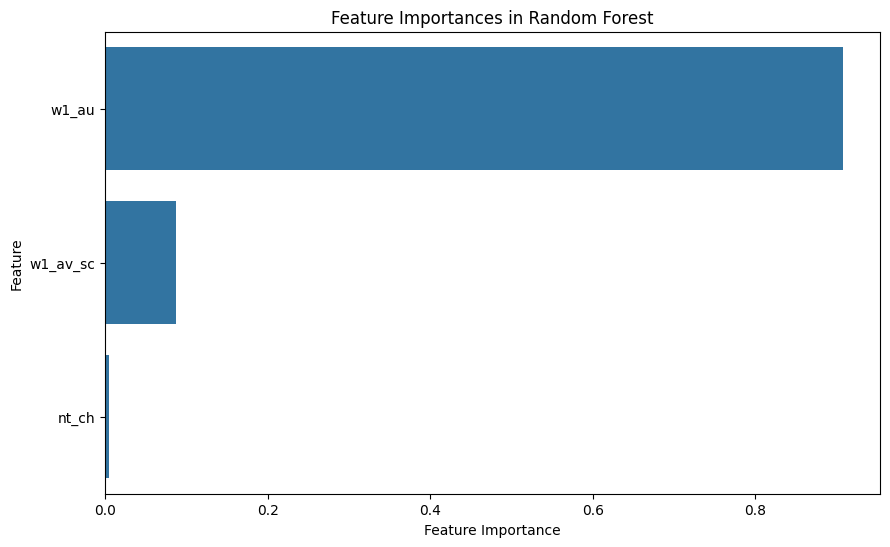

Percentage of predictions within ±10% of actual values: 21.57%
Percentage of predictions within ±20% of actual values: 41.18%


In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 읽기
file_path = 'updated_selected_columns_ver3.csv'  # 파일 경로를 지정하세요
df = pd.read_csv(file_path)

# 독립 변수와 종속 변수 설정
X = df[['w1_au', 'w1_av_sc','nt_ch']]
y = df['w2_au']

df_corr = X.copy()
df_corr['w2_au'] = y

# 상관계수 행렬 계산
corr_matrix = df_corr.corr()

# 상관계수 행렬 출력
print(corr_matrix)

# 상관계수 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 데이터 스케일링 (정규화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할 (train-test split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 설정 (하이퍼파라미터 조정 포함)
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42)

# MSE 스코어링 함수
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# K-폴드 교차 검증 설정 (예: K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증 수행
cv_scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring=mse_scorer)

# 교차 검증 결과 출력
print(f'Cross-Validation MSE Scores: {-cv_scores}')
print(f'Mean Cross-Validation MSE: {-np.mean(cv_scores)}')
print(f'Standard Deviation of Cross-Validation MSE: {np.std(cv_scores)}')

# 모델 학습
rf.fit(X_train, y_train)

# 예측
y_pred = rf.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Test MSE: {mse:.4f}')
print(f'Test RMSE: {rmse:.4f}')
print(f'Test R^2: {r2:.4f}')
print(y_test)
print(y_pred)

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 피처 중요도 추출
importances = rf.feature_importances_
feature_names = X.columns

# 피처 중요도 출력
for feature, importance in zip(feature_names, importances):
    print(f'Feature: {feature}, Importance: {importance:.4f}')

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.show()

# y_pred가 실제 y 값의 ±10% 범위 내에 들어오는 비율 계산
within_10_percent = np.abs(y_pred - y_test) / y_test <= 0.10
within_10_percent_ratio = np.mean(within_10_percent)

print(f'Percentage of predictions within ±10% of actual values: {within_10_percent_ratio * 100:.2f}%')
# y_pred가 실제 y 값의 ±10% 범위 내에 들어오는 비율 계산
within_20_percent = np.abs(y_pred - y_test) / y_test <= 0.20
within_20_percent_ratio = np.mean(within_20_percent)

print(f'Percentage of predictions within ±20% of actual values: {within_20_percent_ratio * 100:.2f}%')


In [2]:
import pandas as pd

# CSV 파일 읽기
file_path = 'preprosessing_ver4.csv'  # 파일 경로를 지정하세요
df = pd.read_csv(file_path)

# 원래 파일의 행 개수
original_row_count = len(df)

# '애니메이션' 장르가 포함된 행 삭제
df_filtered = df[~df['Genre'].str.contains('애니메이션')]

# 결과 파일의 행 개수
filtered_row_count = len(df_filtered)

# 삭제된 행 개수
deleted_row_count = original_row_count - filtered_row_count

# 결과 출력
print(f'Original row count: {original_row_count}')
print(f'Deleted row count: {deleted_row_count}')
print(f'Result row count: {filtered_row_count}')

# 수정된 데이터프레임을 새로운 CSV 파일로 저장 (선택 사항)
output_file_path = 'preprosessing_ver5.csv'
df_filtered.to_csv(output_file_path, index=False)


Original row count: 252
Deleted row count: 48
Result row count: 204
